Постройте модель, предсказывающую, есть ли болезнь сердца у пациента?



Как зависит холестерин от возраста у здоровых людей?

У кого чаще встречаются болезни сердца (пол, возраст)? У кого реже?

In [1]:
import numpy as np
import pandas as pd

In [4]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. Age: Age
2. Sex: Sex (1 = male; 0 = female)
1. ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
3. RestBP: Resting blood pressure
1. Chol: Serum cholestoral in mg/dl
2. Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
3. RestECG: Resting electrocardiographic results
4. MaxHR: Maximum heart rate achieved
5. ExAng: Exercise induced angina (1 = yes; 0 = no)
6. Oldpeak: ST depression induced by exercise relative to rest
7. Slope: Slope of the peak exercise ST segment
8. Ca: Number of major vessels colored by flourosopy (0 - 3)
9. Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
10. target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)

In [167]:
heart = heart[heart.age < 68]
heart = heart[heart.age > 40]
#избавляемся от нерепрезентативного

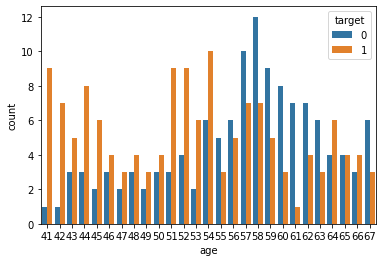

In [168]:
ax = sns.countplot(x="age", hue = "target",  data=heart)

In [162]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Модель: 

In [95]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(Xtrain, ytrain)
ypred = reg.predict(Xtest)
ypred = ypred.round().astype(int)
print(f'Оценка точности: {accuracy_score(ytest, ypred).round(4)}')
print(f'Коэффициент детерминации: {reg.score(Xtrain, ytrain).round(4)}')

Оценка точности: 0.7097
Коэффициент детерминации: 0.5446


Коэффициент детерминации: 0.009839115065064408


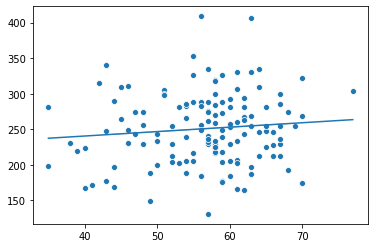

In [149]:
#Как зависит холестерин от возраста у здоровых людей?
import seaborn as sns
healthy = heart[heart.target == 0]
heachol = healthy.chol.to_numpy()
heage = healthy.age.to_numpy()

sns.scatterplot(x = heage, y = heachol)
Xhtrain, Xhtest, yhtrain, yhtest = train_test_split(heage, heachol, test_size = 0.1, random_state = 14)
jreg = linear_model.LinearRegression()
jreg.fit(Xhtrain.reshape(-1, 1), yhtrain.reshape(-1, 1))
cholpred = jreg.predict(Xhtest.reshape(-1, 1))
traincholpred = jreg.predict(Xhtrain.reshape(-1, 1))
sns.lineplot(x = Xhtrain, y = traincholpred.flatten())
print(f'Коэффициент детерминации: {jreg.score(Xhtrain.reshape(-1, 1), yhtrain.reshape(-1, 1))}')

Уровень холестерина слегка повышается, но не достоверно, поэтому можно говорить о том, что уровень ходестерина остаётся более-менее таким же 

In [145]:
# кого чаще встречаются болезни сердца (пол)? У кого реже?
print('Таблица сопряжённости. M - male, F - female, H - healthy, I - ill')
print('   M   F')
MH, MI, FH, FI = len(heart[heart.sex == 1][heart.target == 1]), len(heart[heart.sex == 1][heart.target == 0]), \
                 len(heart[heart.sex == 0][heart.target == 1]), len(heart[heart.sex == 0][heart.target == 0])
print(f'H  {MH}   {FH}')
print(f'I  {MI}  {FI}')
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[MH, FH], [MI, FI]])
if pvalue < 0.05:
    print('Частота встречаемости болезни у мужчин и женщин значимо различается')
    if MI/(MH+MI) > FI/(FH+FI):
        print('Мужчины болеют чаще')
    else:
        print('Женщины болеют чаще')
else:
    print('Достоверных ращличий в заболеваемости между мужчинами и женщинами нет')

Таблица сопряжённости. M - male, F - female, H - healthy, I - ill
   M   F
H  93   72
I  114  24
Частота встречаемости болезни у мужчин и женщин значимо различается
Мужчины болеют чаще


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Мужчины болеют чаще.

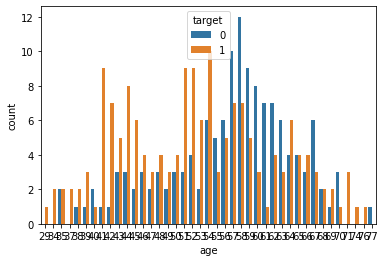

In [161]:
# кого чаще встречаются болезни сердца (возраст)? У кого реже?
ax = sns.countplot(x="age", hue = "target",  data=heart)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


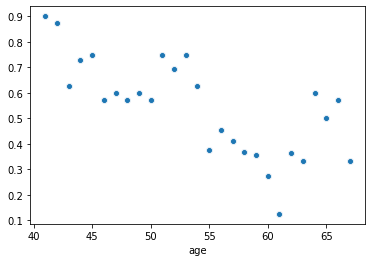

In [175]:

ratio = []
for age in heart.age:
    ratio.append(len(heart[heart.age == age][heart.target == 1]) / (len(heart[heart.age == age][heart.target == 1]) +\
                                                               len(heart[heart.age == age][heart.target == 0])))
sns.scatterplot(x = heart.age, y = ratio)

Вывод: чем моложе, чем чаще встречается эта болезнь. Видимо, до старости не доживают